In [1]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
top_words=10000

In [3]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=top_words)

In [4]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
word_dict=imdb.get_word_index()
word_dict={key:(value+3) for key,value in word_dict.items()}
word_dict['']=0 # padding
word_dict['>']=1 # begining of the review
word_dict['?']=2 # unknown words
reverse_word_dict={value:key for key,value in word_dict.items()}
print(' '.join(reverse_word_dict[id] for id in X_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
from keras.preprocessing import sequence
max_review_length=500
X_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
X_test=sequence.pad_sequences(X_test,maxlen=max_review_length)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

In [17]:
embedding_vector_length=32
model=Sequential()
#sequential model — one that is composed of an end-to-end stack of layers in which the output from one layer provides input to the next.
model.add(Embedding(top_words,embedding_vector_length,input_length=max_review_length))
#embedding layer, which is crucial to neural networks that process words. 
#The embedding layer essentially maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions. 
#It also allows words with similar meanings to be treated alike.
model.add(Flatten())
# flatten  reshapes the output for input to the next layer.
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
#Dense layer also known as fully connected layer,each layer contains n nodes or neurons and each neuron receives input from every neuron 
# These layers that permits a neural network to learn from input data by iteratively guessing at the output checking the results
# and fin tunning the connections to better results.
# The first two dense layers in this network contain 16 neurons each. This number was arbitrarily chosen; 
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# The final dense layer contains just one neuron because the ultimate goal of the network is to predict one output 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# the call to the complie function complies the model by specifying important parameters such as which optimizer to use and what 
# what metrics to use to judge the accuracy of the model in each training step.
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 576,397
Trainable params: 576,397
Non-trainable params: 0
________________________________________________

In [18]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128)
#epoch=5 tells keras to make 5 forward and backword passes through the model.with each pass the model learns from the training data
# and measures(validates) how well it learned using the test data.then it makes the adjustment and goes back for the next pass or epoch
# Batch_size=128 tells keras to use 128 training samples at a time to train the network.


C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 59s 2ms/step - loss: 0.6167 - accuracy: 0.6088 - val_loss: 0.3248 - val_accuracy: 0.86346360 
Epoch 2/5
25000/25000 [==============================] - 15s 586us/step - loss: 0.2336 - accuracy: 0.9086 - val_loss: 0.2878 - val_accuracy: 0.8781
Epoch 3/5
25000/25000 [==============================] - 17s 682us/step - loss: 0.0791 - accuracy: 0.9780 - val_loss: 0.3374 - val_accuracy: 0.8729
Epoch 4/5
25000/25000 [==============================] - 18s 707us/step - loss: 0.0198 - accuracy: 0.9965 - val_loss: 0.4036 - val_accuracy: 0.8687
Epoch 5/5
25000/25000 [==============================] - 18s 719us/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.4603 - val_accuracy: 0.8695


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

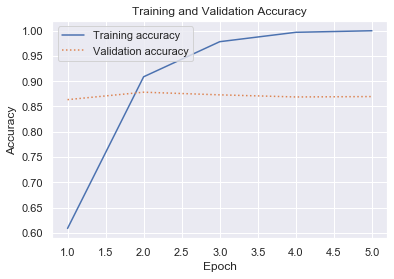

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

In [26]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("accuracy:%.2f%%" % (scores[1]*100))

accuracy:86.95%
